# Problem

### Develop a model to tell if the client will default  the payment or not 

## Importing Lib

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read Dataset

In [2]:
df = pd.read_excel("default of credit card clients.xls",header=1)

## First glance at your data

In [3]:
print("Number of features: {}".format(df.shape[1]))
print("Number of samples: {}".format(df.shape[0]))

Number of features: 25
Number of samples: 30000


In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


 from first glance i see that column name deal as row not feature name

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
for i in range(df.shape[1]):
    print("###########################     {}    ###########################".format(df.columns[i]))
    print(df.iloc[:,i].unique())
    print(" ")
    print(" ")

###########################     ID    ###########################
[    1     2     3 ... 29998 29999 30000]
 
 
###########################     LIMIT_BAL    ###########################
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
 
 
###########################     SEX    ###########################
['female' 'male']
 
 
###########################     EDUCATION    ###################

<AxesSubplot:>

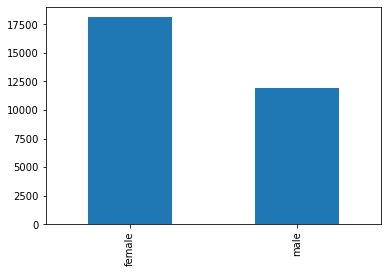

In [8]:
df['SEX'].value_counts().plot.bar()

<AxesSubplot:>

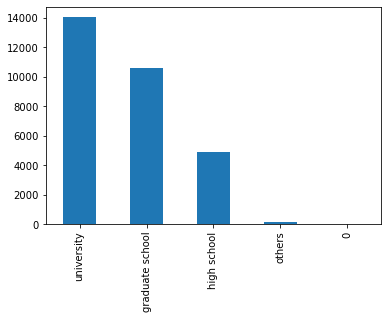

In [9]:
df['EDUCATION'].value_counts().plot.bar()

<AxesSubplot:>

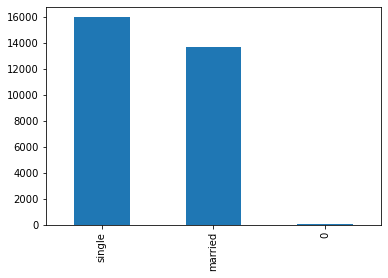

In [10]:
df['MARRIAGE'].value_counts().plot.bar()

<AxesSubplot:>

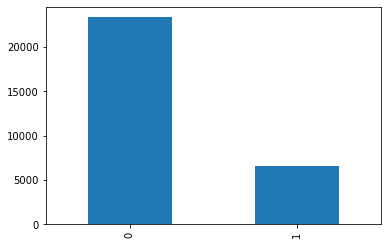

In [11]:
df['default payment next month'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

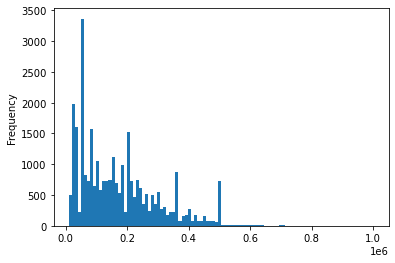

In [12]:
df["LIMIT_BAL"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

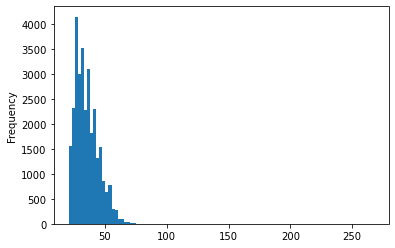

In [13]:
df["AGE"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

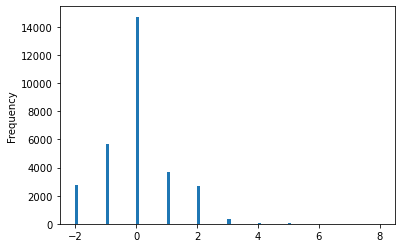

In [14]:
df["PAY_0"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

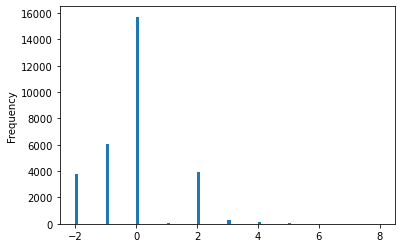

In [15]:
df["PAY_2"].plot.hist(bins=100)

## Dealing with missing values

In [16]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
EDUCATION,331,0.011033
MARRIAGE,323,0.010767
default payment next month,0,0.000000
PAY_6,0,0.000000
LIMIT_BAL,0,0.000000
SEX,0,0.000000
AGE,0,0.000000
PAY_0,0,0.000000
PAY_2,0,0.000000
PAY_3,0,0.000000


we will impute with most frequent in case of Education impute with "university" in case of Mariage impute with "single"

In [17]:
df["EDUCATION"].fillna("university", inplace = True)
df["MARRIAGE"].fillna("single", inplace = True)

In [18]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
default payment next month,0,0.0
PAY_6,0,0.0
LIMIT_BAL,0,0.0
SEX,0,0.0
EDUCATION,0,0.0
MARRIAGE,0,0.0
AGE,0,0.0
PAY_0,0,0.0
PAY_2,0,0.0
PAY_3,0,0.0


In [19]:
df["EDUCATION"].replace(0,"university",inplace=True)
df["MARRIAGE"].replace(0,"single",inplace=True)

In [20]:
for i in range(df.shape[1]):
    print("###########################     {}    ###########################".format(df.columns[i]))
    print(df.iloc[:,i].unique())
    print(" ")
    print(" ")

###########################     ID    ###########################
[    1     2     3 ... 29998 29999 30000]
 
 
###########################     LIMIT_BAL    ###########################
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
 
 
###########################     SEX    ###########################
['female' 'male']
 
 
###########################     EDUCATION    ###################

### Box Plot

<AxesSubplot:xlabel='AGE'>

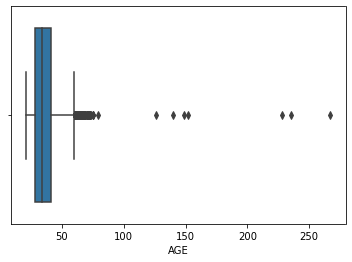

In [21]:
sns.boxplot(x=df["AGE"])

<AxesSubplot:xlabel='BILL_AMT1'>

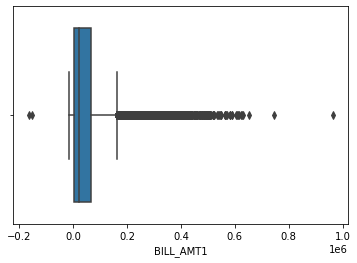

In [22]:
sns.boxplot(x=df["BILL_AMT1"])

<AxesSubplot:xlabel='BILL_AMT2'>

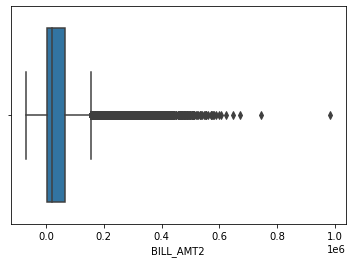

In [23]:
sns.boxplot(x=df["BILL_AMT2"])

<AxesSubplot:xlabel='BILL_AMT3'>

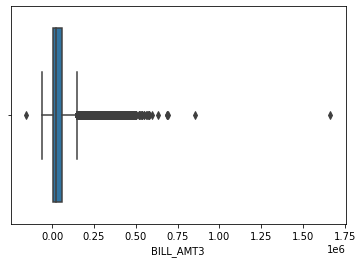

In [24]:
sns.boxplot(x=df["BILL_AMT3"])

<AxesSubplot:xlabel='LIMIT_BAL'>

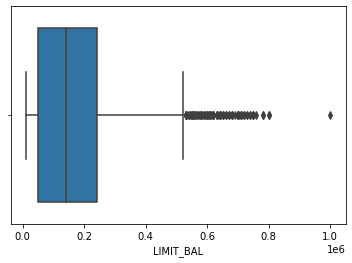

In [25]:
sns.boxplot(x=df["LIMIT_BAL"])

<AxesSubplot:xlabel='PAY_0'>

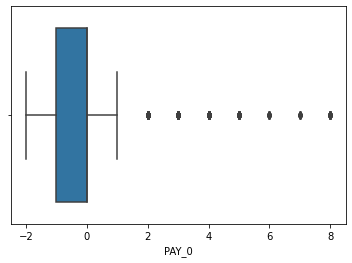

In [26]:
sns.boxplot(x=df["PAY_0"])

<AxesSubplot:xlabel='PAY_AMT1'>

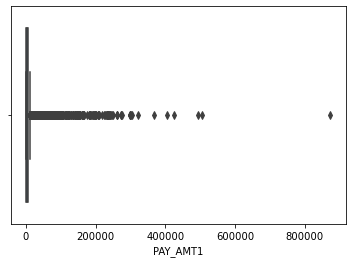

In [27]:
sns.boxplot(x=df["PAY_AMT1"])

<AxesSubplot:xlabel='PAY_AMT6'>

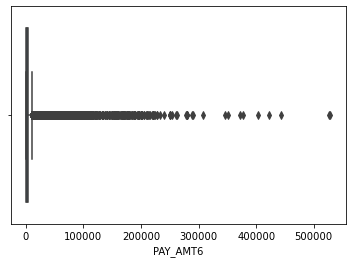

In [28]:
sns.boxplot(x=df["PAY_AMT6"])

AGE column has outliers 

In [29]:
df["AGE"].value_counts().mode

<bound method Series.mode of 29     1605
27     1477
28     1408
30     1395
26     1255
       ... 
74        1
149       1
152       1
126       1
79        1
Name: AGE, Length: 63, dtype: int64>

we will impute with the most ferquent value 29

In [30]:
df.loc[df.AGE > 110, 'AGE'] = 29

In [31]:
df[df["AGE"]>100]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


## correlation

Text(0.5, 1.0, 'dataset correlation')

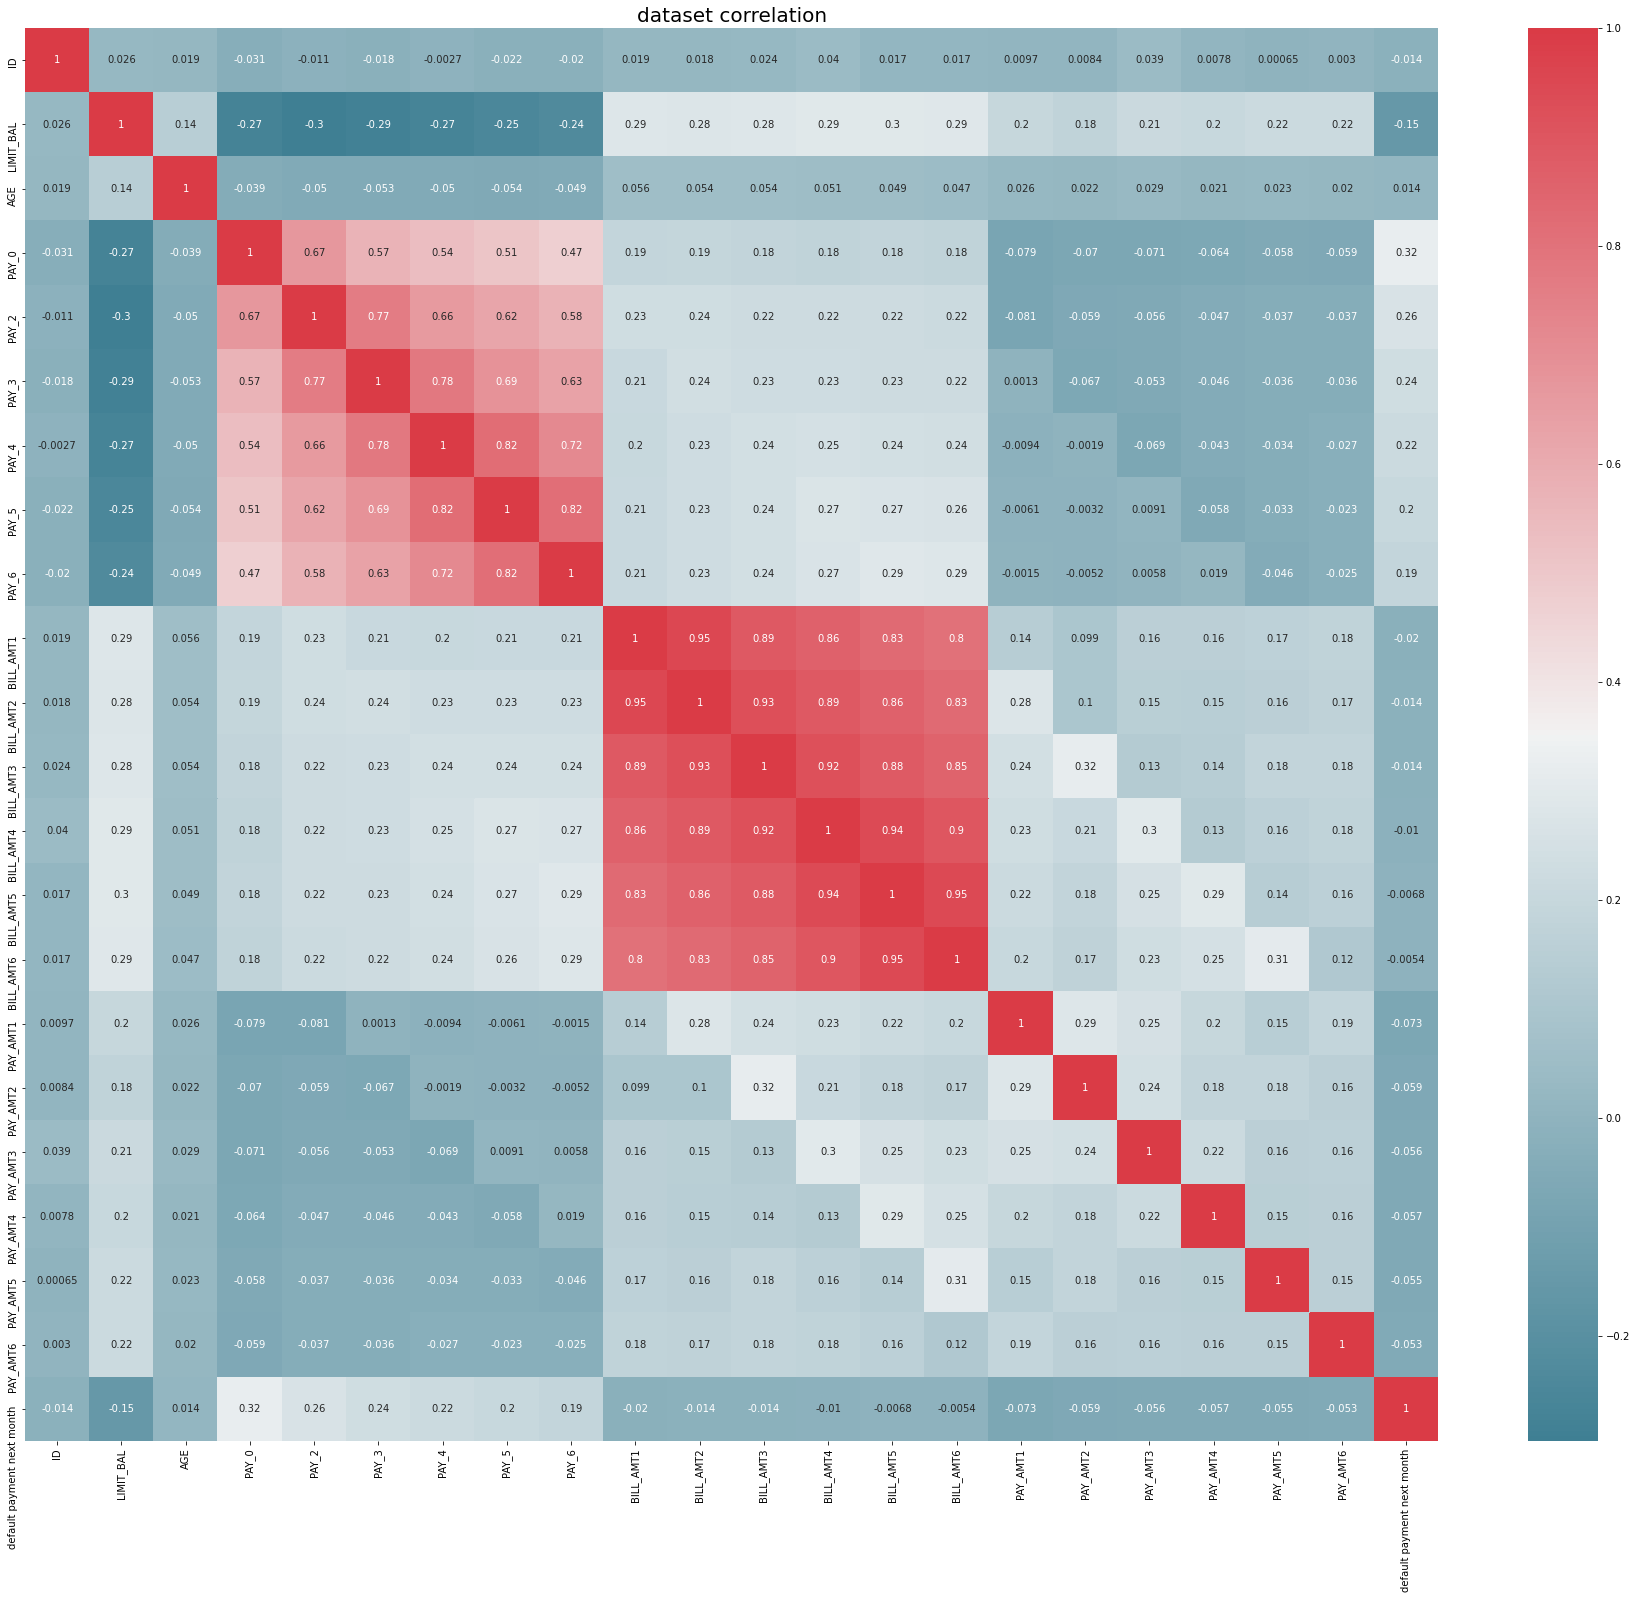

In [32]:
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [33]:
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.9:
            col_name = correlation_matrix.columns[i]
            correlated_features.add(col_name)
print(correlated_features)

{'BILL_AMT6', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT2', 'BILL_AMT4'}


In [34]:
df_clean = df.drop(correlated_features, axis=1)

## Encoding categorical data

In [35]:
df1 = pd.get_dummies(df_clean[['SEX', 'EDUCATION','MARRIAGE']], prefix=['SEX', 'EDUCATION','MARRIAGE'])

In [36]:
df2 = df_clean.drop(['SEX', 'EDUCATION','MARRIAGE','ID'], axis=1)

In [37]:
df_final = df1.join(df2)

In [38]:
df_final

,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_single,LIMIT_BAL,AGE,...,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,0,0,0,0,1,1,0,20000,24,...,-2,-2,3913,0,689,0,0,0,0,1
1,1,0,0,0,0,1,0,1,120000,26,...,0,2,2682,0,1000,1000,1000,0,2000,1
2,1,0,0,0,0,1,0,1,90000,34,...,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,1,0,0,0,0,1,1,0,50000,37,...,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,0,1,0,0,0,1,1,0,50000,57,...,0,0,8617,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,1,0,1,0,0,1,0,220000,39,...,0,0,188948,8500,20000,5003,3047,5000,1000,0
29996,0,1,0,1,0,0,0,1,150000,43,...,0,0,1683,1837,3526,8998,129,0,0,0
29997,0,1,0,0,0,1,0,1,30000,37,...,0,0,3565,0,0,22000,4200,2000,3100,1
29998,0,1,0,1,0,0,1,0,80000,41,...,0,-1,-1645,85900,3409,1178,1926,52964,1804,1


## Training

In [39]:
from sklearn.model_selection import train_test_split

# Get the feature values until the target column (not included)
X = df_final.values[:, :-1].astype(np.float32)

# Get the target column
y = df_final.values[:, -1].astype(np.float32)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#feature scaling independent variables
X = sc.fit_transform(X)

## Spliting

In [41]:
# Get 80% of the data for training; the remaining 20% will be for validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Length of train_features is: {X_train.shape}")
print(f"Length of train_labels is: {y_train.shape}")
print(f"Length of test_features is: {X_test.shape}")
print(f"Length of test_labels is: {y_test.shape}")

Length of train_features is: (24000, 23)
Length of train_labels is: (24000,)
Length of test_features is: (6000, 23)
Length of test_labels is: (6000,)


## SKlearn_ NN

In [42]:
from sklearn.neural_network import MLPClassifier
classifier_N_N = MLPClassifier()
classifier_N_N.fit(X_train, y_train)

MLPClassifier()

## Model Results

In [43]:
y_pred_test = classifier_N_N.predict(X_test)
y_pred_train = classifier_N_N.predict(X_train)

## Calculate Accuracy Test Set

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.809

## Calculate Accuracy train Set

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.8345

## Calculate confusion matrix Test Set

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[4400,  241],
       [ 905,  454]], dtype=int64)

## Applying k-Fold Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_N_N, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 81.30 %


## Training XGBoost on the Training set

In [48]:
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

# Predicting the Test set results
y_pred_XGB = classifier_XGB.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_XGB)

[22:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[4395,  246],
       [ 894,  465]], dtype=int64)

### XGB Result

In [49]:
accuracy_score(y_test,y_pred_XGB)

0.81